In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline  

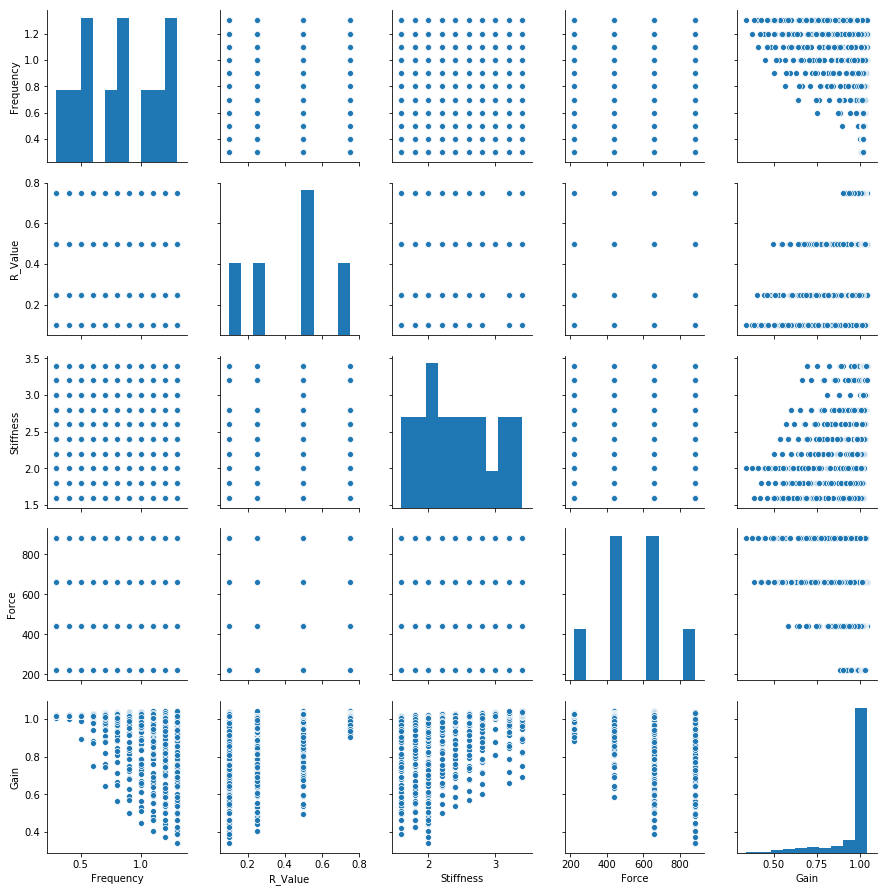

In [2]:
df=pd.read_csv(r"C:\Users\Public\MLinputs.csv")
sns.pairplot(df)

# ML Prep & Imports

In [3]:
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

In [4]:
X = df.drop(['Gain'],axis=1)
Y = pd.DataFrame(df.Gain)
processed_X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(processed_X, Y, test_size=0.2, random_state=42)

In [106]:
import numpy as np
ravelled_y_train=np.ravel(y_train['Gain'])

# Gaussian Process Regression

Text(0, 0.5, 'Predicted Gain')

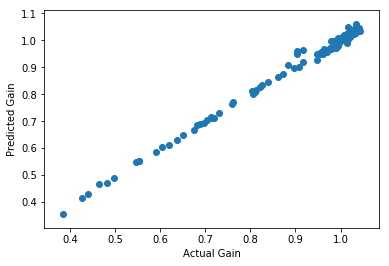

In [5]:
kernel = RBF() + DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,normalize_y= False).fit(X_train, y_train)
gpr.score(X_train, y_train)

predictions_gauss, sigma=gpr.predict(X_test, return_std=True)

plt.scatter(y_test,predictions_gauss)
plt.xlabel('Actual Gain')
plt.ylabel('Predicted Gain')

In [6]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, predictions_gauss)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, predictions_gauss))))
print('R^2 is {}'.format(r2_score(y_test, predictions_gauss)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, predictions_gauss)))

Mean Absolute Error is 0.005341666937493026
Root Mean Squared Error is 0.009244371125957133
R^2 is 0.9954398070766003
Explained Regression Variance is 0.99544466867307


Text(0, 0.5, 'Frequency')

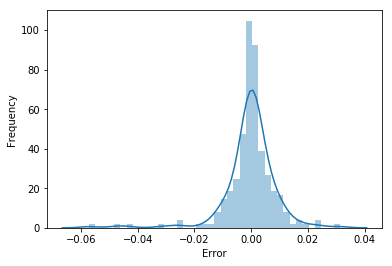

In [7]:
sns.distplot((y_test-predictions_gauss), bins = 40);
plt.xlabel('Error')
plt.ylabel('Frequency')

In [8]:
# from sklearn.externals import joblib 
# joblib.dump(gpr, 'Gauss Model.pkl') 

## Support Vector Regression

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [10]:
# clf = GridSearchCV(SVR(), 
#     {'gamma':[0.5,1,2],
#      'epsilon':[0.00001,0.0001,0.001],
#      'C': [0.5,1,2,10],
#     'kernel': ['rbf']}, 
#     return_train_score=False)
# clf.fit(X_train, y_train)

In [11]:
# df = pd.DataFrame(clf.cv_results_)
# df = df[df['mean_test_score']  >= 0.9957]  
# df[['param_C','param_gamma','param_epsilon','param_kernel','mean_test_score']]

In [12]:
# print(clf.best_params_)

In [107]:
svr_model = SVR(C=1, epsilon=0.0001,gamma=1,kernel='rbf')
svr_model.fit(X_train,ravelled_y_train)
svr_model.score(X_test, y_test)

0.9973888237183748

Text(0, 0.5, 'Predicted Gain')

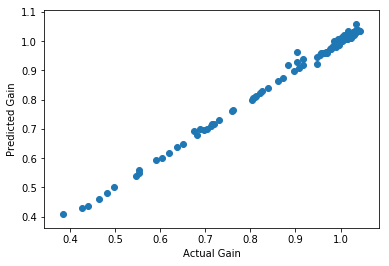

In [108]:
svr_predictions=svr_model.predict(X_test)
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Gain')
plt.ylabel('Predicted Gain')

In [15]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, svr_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, svr_predictions))))
print('R^2 is {}'.format(r2_score(y_test, svr_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, svr_predictions)))

Mean Absolute Error is 0.0031909561204777623
Root Mean Squared Error is 0.006995259989883796
R^2 is 0.9973888237183749
Explained Regression Variance is 0.997409317496646


# Linear Regression Models

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

## Standard Linear Regression

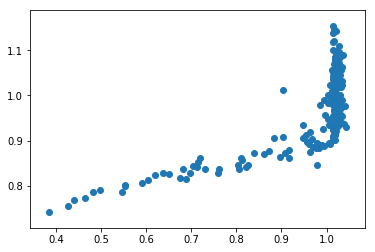

In [31]:
lm=LinearRegression(normalize=True)
lm.fit(X_train,y_train)
lm_predictions=lm.predict(X_test)
plt.scatter(y_test,lm_predictions) 

In [133]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, lm_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, lm_predictions))))
print('R^2 is {}'.format(r2_score(y_test, lm_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, lm_predictions)))

Mean Absolute Error is 0.06870878434778468
Root Mean Squared Error is 0.0933091985203126
R^2 is 0.5354019425486947
Explained Regression Variance is 0.5354570107705721


## Linear Ridge

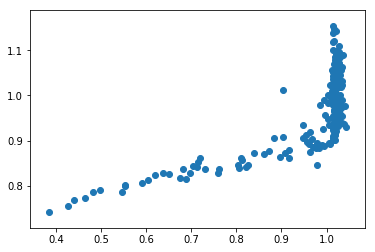

In [32]:
lm=Ridge()
lm.fit(X_train,y_train)
ridge_predictions=lm.predict(X_test)
plt.scatter(y_test,ridge_predictions) 

In [134]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, lm_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, lm_predictions))))
print('R^2 is {}'.format(r2_score(y_test, lm_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, lm_predictions)))

Mean Absolute Error is 0.06870878434778468
Root Mean Squared Error is 0.0933091985203126
R^2 is 0.5354019425486947
Explained Regression Variance is 0.5354570107705721


## SGD Regressor

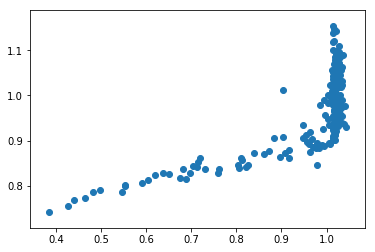

In [121]:
sgd=SGDRegressor(max_iter=10000,tol=0.0001)
sgd.fit(X_train,ravelled_y_train)
sgd_predictions=lm.predict(X_test)
plt.scatter(y_test,sgd_predictions) 

In [34]:
print('Mean Absolute Error is {}'.format(mean_absolute_error(y_test, lm_predictions)))
print('Root Mean Squared Error is {}'.format(sqrt(mean_squared_error(y_test, lm_predictions))))
print('R^2 is {}'.format(r2_score(y_test, lm_predictions)))
print('Explained Regression Variance is {}'.format(explained_variance_score(y_test, lm_predictions)))

Mean Absolute Error is 0.06870878434778468
Root Mean Squared Error is 0.0933091985203126
R^2 is 0.5354019425486947
Explained Regression Variance is 0.5354570107705721


## Bayesian Regression

In [47]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

In [122]:
br = GridSearchCV(BayesianRidge(), 
    {'alpha_1':[0.0000000001, 0.000001, 0.01],
     'alpha_2':[0.0000000001, 0.000001, 0.01],
    'lambda_1':[0.0000000001, 0.000001, 0.01],
    'lambda_2':[0.0000000001, 0.000001, 0.01],
    },
    cv=5, return_train_score=False, verbose=True)
br.fit(X_train, ravelled_y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha_1': [1e-10, 1e-06, 0.01], 'alpha_2': [1e-10, 1e-06, 0.01], 'lambda_1': [1e-10, 1e-06, 0.01], 'lambda_2': [1e-10, 1e-06, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=True)

In [123]:
df = pd.DataFrame(br.cv_results_)
# df = df[df['mean_test_score']  >= 0.9957]  
df[['param_alpha_1','param_alpha_2','param_lambda_1','param_lambda_2','mean_test_score']].head()

,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,mean_test_score
0,1e-10,1e-10,1e-10,1e-10,0.477359
1,1e-10,1e-10,1e-10,1e-06,0.477359
2,1e-10,1e-10,1e-10,0.01,0.477320
3,1e-10,1e-10,1e-06,1e-10,0.477359
4,1e-10,1e-10,1e-06,1e-06,0.477359


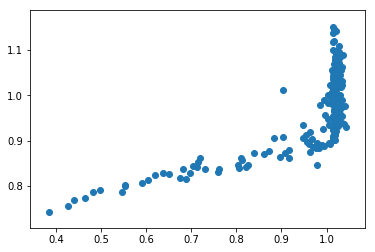

In [132]:
br = BayesianRidge(normalize=True)
clf.fit(X_train, ravelled_y_train)
predictions=clf.predict(X_test)
plt.scatter(y_test,predictions)

# Kernal Ridge

In [44]:
from sklearn.kernel_ridge import KernelRidge

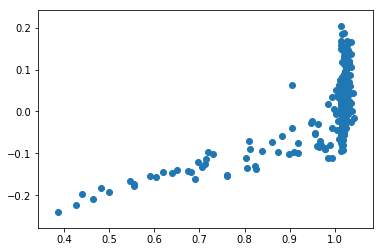

In [131]:
kr = KernelRidge()
kr.fit(X_train, ravelled_y_train)
kr_predictions=kr.predict(X_test)
plt.scatter(y_test,kr_predictions)